###Lung Cancer Detection and Classification Using Deep CNN<br>
* Median filter<br>
* Deep CNN


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, shutil
import math
import numpy as np
import cv2

In [0]:
print(len(os.listdir('drive/My Drive/data/train/cancer')))
print(len(os.listdir('drive/My Drive/data/train/noncancer')))
print(len(os.listdir('drive/My Drive/data/test/cancer')))
print(len(os.listdir('drive/My Drive/data/test/noncancer')))

700
700
117
115


**Median filtering**

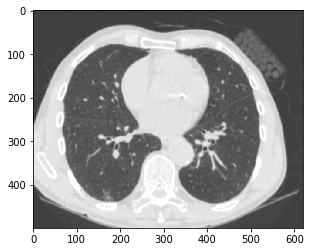

In [0]:
img = plt.imread('620px-Patient559_metSigaretten_cropped.png')

plt.imshow(img,cmap=plt.cm.gray)

In [0]:
img.shape

(500, 620, 4)

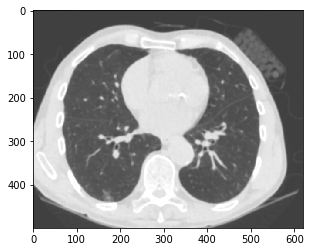

In [0]:
img_median = cv2.medianBlur(img, 5)    #kernel size=5

plt.imshow(img_median,cmap=plt.cm.gray)

In [0]:
def filtering(img):
  res1 = cv2.medianBlur(img, 5)
  res1 /= 255.0
  return res1

In [4]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
train_path = 'drive/My Drive/data/train'
test_path = 'drive/My Drive/data/test'

train_batches = ImageDataGenerator(preprocessing_function=filtering).flow_from_directory(train_path,target_size=(512,512),
                                                        classes=['cancer','noncancer'],batch_size=20,color_mode='rgb')
test_batches = ImageDataGenerator(preprocessing_function=filtering).flow_from_directory(test_path,target_size=(512,512),
                                                        classes=['cancer','noncancer'],batch_size=20,color_mode='rgb')

Found 1393 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='valid',input_shape=(512,512,3)))
model.add(Conv2D(32, (3, 3), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))



In [0]:

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

#model.add(Dense(1024))
#model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [62]:
model.summary() #538,497,794

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 510, 510, 32)      896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 508, 508, 32)      9248      
_________________________________________________________________
average_pooling2d_29 (Averag (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 252, 252, 64)      18496     
_________________________________________________________________
average_pooling2d_30 (Averag (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
average_pooling2d_31 (Averag (None, 62, 62, 64)      

In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile( loss='categorical_crossentropy',metrics=['accuracy'],optimizer = opt)

In [66]:
model.fit_generator(train_batches,steps_per_epoch=math.ceil(700/20), epochs=20, 
                           validation_data=test_batches)

Epoch 1/20





35/35 [==============================] - 344s 10s/step - loss: 1.4002 - acc: 0.5229 - val_loss: 0.7043 - val_acc: 0.5043
Epoch 2/20
35/35 [==============================] - 324s 9s/step - loss: 0.7092 - acc: 0.5160 - val_loss: 0.7334 - val_acc: 0.5043
Epoch 3/20
35/35 [==============================] - 15s 433ms/step - loss: 0.7179 - acc: 0.5333 - val_loss: 0.7014 - val_acc: 0.5129
Epoch 4/20
35/35 [==============================] - 15s 432ms/step - loss: 0.6829 - acc: 0.5671 - val_loss: 0.7151 - val_acc: 0.4871
Epoch 5/20
35/35 [==============================] - 15s 429ms/step - loss: 0.6702 - acc: 0.5757 - val_loss: 0.7452 - val_acc: 0.5000
Epoch 6/20
35/35 [==============================] - 16s 447ms/step - loss: 0.6790 - acc: 0.5768 - val_loss: 0.7228 - val_acc: 0.4784
Epoch 7/20
35/35 [==============================] - 16s 452ms/step - loss: 0.6302 - acc: 0.6219 - val_loss: 0.7477 - val_acc: 0.4957
Epoch 8/20
35/35 [==============================] - 16s 451ms/step 

In [68]:
model.save('my_model.h5')
!ls

drive  my_model.h5  sample_data


In [70]:
!du -sh my_model.h5 

362M	my_model.h5


In [0]:
os.listdir('drive/My Drive/data')

In [76]:
from shutil import copyfile
copyfile('my_model.h5', 'drive/My Drive/data/my_model.h5')

'drive/My Drive/data/my_model.h5'

In [77]:
os.listdir('drive/My Drive/data')

['cancer', 'noncancer', 'train', 'test', 'my_model.h5']